# Notebook 05: Model Training - Ames

Train Lasso, Random Forest, and XGBoost models on Ames data.\
Compare performance metrics.

In [11]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(42)

## Load Prepared Data

In [ ]:
# Load scaled features and targets
X_ames_scaled = pd.read_csv('data/processed/ames_X_scaled.csv')
y_ames = pd.read_csv('data/processed/ames_y.csv').values.ravel()

print(f"Ames training data loaded:")
print(f"  X shape: {X_ames_scaled.shape}")
print(f"  y shape: {y_ames.shape}")

# Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X_ames_scaled, y_ames, test_size=0.2, random_state=42
)

print(f"\nTrain/Val split:")
print(f"  Train: {X_train.shape} samples")
print(f"  Val: {X_val.shape} samples")

Ames training data loaded:
  X shape: (2793, 268)
  y shape: (2793,)

Train/Val split:
  Train: (2234, 268) samples
  Val: (559, 268) samples


## Train Lasso Model

In [13]:
print("Training Lasso Regression...")
lasso = Lasso(alpha=1000, random_state=42, max_iter=5000)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_val)

r2_lasso = r2_score(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_pred_lasso))
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)

print(f"\nLasso Results:")
print(f"  R² Score: {r2_lasso:.4f}")
print(f"  RMSE: ${rmse_lasso:,.0f}")
print(f"  MAE: ${mae_lasso:,.0f}")

Training Lasso Regression...

Lasso Results:
  R² Score: 0.8284
  RMSE: $25,261
  MAE: $14,652


## Train Random Forest Model

In [14]:
print("Training Random Forest...")
rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

r2_rf = r2_score(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)

print(f"\nRandom Forest Results:")
print(f"  R² Score: {r2_rf:.4f}")
print(f"  RMSE: ${rmse_rf:,.0f}")
print(f"  MAE: ${mae_rf:,.0f}")

Training Random Forest...

Random Forest Results:
  R² Score: 0.8891
  RMSE: $20,305
  MAE: $14,035


## Train XGBoost Model

In [15]:
print("Training XGBoost...")
xgb = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train, verbose=False)

y_pred_xgb = xgb.predict(X_val)

r2_xgb = r2_score(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print(f"\nXGBoost Results:")
print(f"  R² Score: {r2_xgb:.4f}")
print(f"  RMSE: ${rmse_xgb:,.0f}")
print(f"  MAE: ${mae_xgb:,.0f}")

Training XGBoost...

XGBoost Results:
  R² Score: 0.9067
  RMSE: $18,632
  MAE: $12,864


## Model Comparison


Model Comparison (Ames):
        Model  R2_Score         RMSE          MAE
      XGBoost  0.906657 18631.823958 12864.223633
Random Forest  0.889142 20304.754739 14035.088131
        Lasso  0.828413 25261.328220 14652.129770


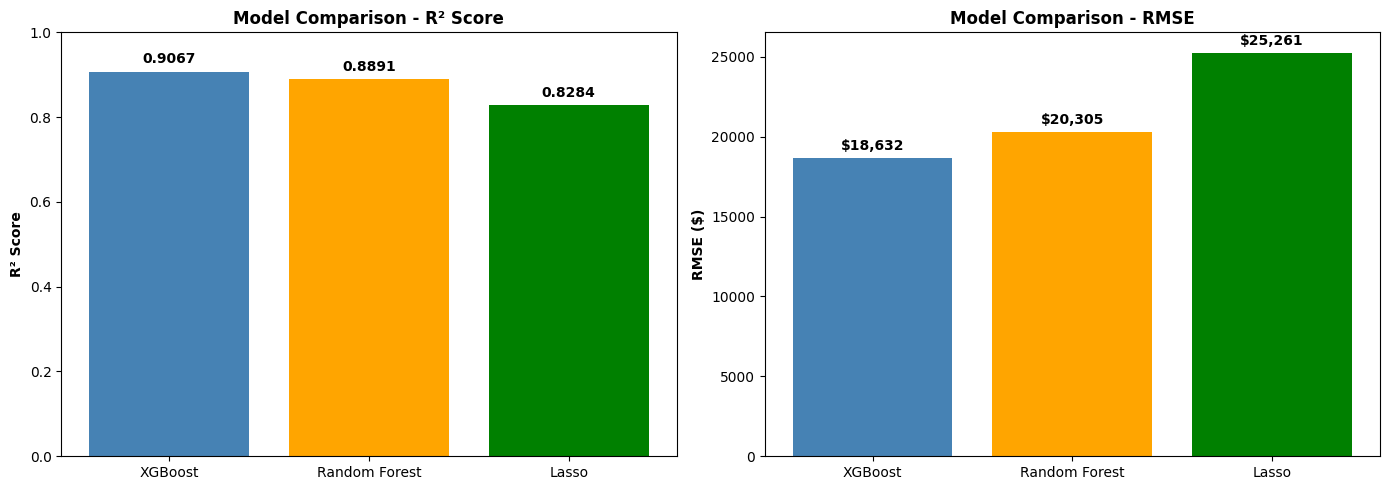

In [16]:
# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': ['Lasso', 'Random Forest', 'XGBoost'],
    'R2_Score': [r2_lasso, r2_rf, r2_xgb],
    'RMSE': [rmse_lasso, rmse_rf, rmse_xgb],
    'MAE': [mae_lasso, mae_rf, mae_xgb]
})

comparison = comparison.sort_values('R2_Score', ascending=False)

print("\nModel Comparison (Ames):")
print(comparison.to_string(index=False))

# Visualize
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Comparison
axes[0].bar(comparison['Model'], comparison['R2_Score'], color=['steelblue', 'orange', 'green'])
axes[0].set_ylabel('R² Score', fontweight='bold')
axes[0].set_title('Model Comparison - R² Score', fontweight='bold')
axes[0].set_ylim([0, 1])

for i, v in enumerate(comparison['R2_Score']):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# RMSE Comparison
axes[1].bar(comparison['Model'], comparison['RMSE'], color=['steelblue', 'orange', 'green'])
axes[1].set_ylabel('RMSE ($)', fontweight='bold')
axes[1].set_title('Model Comparison - RMSE', fontweight='bold')

for i, v in enumerate(comparison['RMSE']):
    axes[1].text(i, v + 500, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**R² Score Comparison:**
**XGBoost** takes the lead as the best model with an R² score of **0.9067**, effectively explaining ~91% of price variations. Random Forest follows closely (0.89), while **Lasso** is the weakest performer (0.83), confirming that complex non-linear models fit this dataset better.

**RMSE Comparison:**
The error chart confirms XGBoost's superiority, achieving the lowest average error of just **$18,632**. Random Forest is slightly less accurate ($20,305), and Lasso has the highest error ($25,261), showing that boosting techniques provide the most precise price predictions here.

## Save Metrics

In [ ]:
os.makedirs('results', exist_ok=True)

# Create dataframe with all metrics
metrics_df = pd.DataFrame({
    'Dataset': ['Ames', 'Ames', 'Ames'],
    'Model': ['Lasso', 'Random Forest', 'XGBoost'],
    'R2_Score': [r2_lasso, r2_rf, r2_xgb],
    'RMSE': [rmse_lasso, rmse_rf, rmse_xgb],
    'MAE': [mae_lasso, mae_rf, mae_xgb]
})

# Save to CSV (create new file)
metrics_df.to_csv('results/model_metrics.csv', index=False)

print("Metrics saved to results/model_metrics.csv")
print(metrics_df.to_string(index=False))

Metrics saved to results/model_metrics.csv
Dataset         Model  R2_Score         RMSE          MAE
   Ames         Lasso  0.828413 25261.328220 14652.129770
   Ames Random Forest  0.889142 20304.754739 14035.088131
   Ames       XGBoost  0.906657 18631.823958 12864.223633


## Save Models

In [ ]:
import pickle
import os

os.makedirs('results/models', exist_ok=True)

# Save models
with open('results/models/ames_lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso, f)

with open('results/models/ames_rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('results/models/ames_xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

print("Models saved:")
print("  - ames_lasso_model.pkl")
print("  - ames_rf_model.pkl")
print("  - ames_xgb_model.pkl")

Models saved:
  - ames_lasso_model.pkl
  - ames_rf_model.pkl
  - ames_xgb_model.pkl


## Training Summary

In [19]:
print("AMES MODEL TRAINING SUMMARY")

print(f"\nBest Model: {comparison.iloc[0]['Model']}")
print(f"R² Score: {comparison.iloc[0]['R2_Score']:.4f}")
print(f"RMSE: ${comparison.iloc[0]['RMSE']:,.0f}")
print(f"MAE: ${comparison.iloc[0]['MAE']:,.0f}")

AMES MODEL TRAINING SUMMARY

Best Model: XGBoost
R² Score: 0.9067
RMSE: $18,632
MAE: $12,864
